# Lab 1: Text Corpora and Language Modelling

Welcome to the first lab assignment of INFOMNLP 2025.

This lab is meant to help you get familiar with some language data, and use this data to estimate simple models called N-gram language models.

First, you will use the **Penn Treebank**, which is a collection of newspaper articles from the newspaper
The Wall Street Journal. The idea is to examine the data and notice interesting properties. This will not take more than a few lines of code. The Penn Treebank may be the most widely used corpus in NLP.

Then you will use a corpus consisting of **TedX** talks. This you will use to estimate an **N-gram language model** for different orders of N, and use this for some tasks.

The dataset URLs are in the notebook and certain cells are responsible for downloading them.

The questions marked **Extra** or **Optional** are an additional challenge for those interested in going the extra mile. There are no points for them.

# Rules

You are greatly encouraged to add comments to your code describing what particular lines of code do (in general, a great habit to have in your coding life).
Additionally, please follow these rules when submitting the notebook:

* Put all code in the cell with the `# YOUR CODE HERE` comment.
* For theoretical questions, put your solution in the `YOUR ANSWER HERE` or `ANSWER UNDER THIS LINE` cells (and keep the header if any).
* Don't change or delete any initially provided cells, either text or code, unless explicitly instructed to do so.
* Don't delete the comment lines `# TEST...` or edit their code cells. The test cells are for sanity checking. Passing them doesn't necessarily mean that your code is fine.
* Don't change the names of provided functions and variables or arguments of the functions.
* Don't clear the output of your code cells.
* Don't output unnecessary info (e.g., printing variables for debugging purposes). This clutters the notebook and slows down the grading. You can have print() in the code, but comment them out before submitting the notebook.
* Delete those cells that you inserted for your own debugging/testing purposes.
* Don't forget to fill in the **contribution information**.
* Don't forget to fill in the **work description section** per exercise.
* Test your code and **make sure we can run your notebook** in the colab environment.
* A single notebook file (without archiving) per group should be submitted via BB.

<font color="red">Following these rules helps us to grade the submissions relatively efficiently. If these rules are violated, a submission will be subject to penalty points.</font>  

# <font color="red">Contributions</font>

**Names:**

Alexia Ntantouri <br>
Juan David Liut Aymar <br>

**Contributions:**

**EX. 1.1** <br>
**a:** code and answer - Alexia and David<br>
**b:** code and improvement - Alexia and David<br>
**c:** code, testing and improvement - Alexia and David<br>
**d:** code - Alexia and David<br>

**EX. 1.2** <br>
**a:** code - Alexia and David<br>
**b:** code and answer - Alexia and David<br>

**EX. 2.1:** code, testing and refinement - Alexia and David<br>
**EX. 2.2:** code, testing and refinement - Alexia and David<br>
**EX. 2.3:** code and answer - Alexia and David<br>
**EX. 2.4:** code and answer - Alexia and David<br>
**EX. 2.5:** code and answer - Alexia and David<br>

# General instructions

Before diving into the exercises, keep in mind that the variables defined previously can be reused in the subsequent cells. So there is no need to redefine the same variable in multiple sections, e.g., it is sufficient to read the file in a variable once and later reuse the value of the variable, instead of re-reading the file.   

If your code is too long and uses several code cells instead of a single code cell, rethink how to organize data in variables so that you can easily access the required info. Reading about [list comprehension](https://realpython.com/list-comprehension-python/#leverage-list-comprehensions) can be useful.

Your code will often be evaluated based on its behaviour. So, during the grading some code cells are executed. If code runtime is too long than expected, this will hinder grading.

<font color="red">**The cases similar to the above-mentioned ones will be subject to penalty points.**</font>

<font color="red">**Pay attention to test units**</font> that are either provided as assert cases or as comments. Test units help you by giving you a hint about the correct answer. Note that **passing test units doesn't guarantee the full points** for an exercise because test units are incomplete, and the code might fail on other test units.

# Set up

In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict, Counter

In [ ]:
! rm -rf data # remove if it was downloaded
! wget -nv -P data https://naturallogic.pro/_files_/download/mNLP/PTB/sec02-21.gold.tagged # download the file
! wget -nv -P data https://naturallogic.pro/_files_/download/mNLP/PTB/sec00.gold.tagged
! wget -nv -P data https://naturallogic.pro/_files_/download/mNLP/TED/ted-train.txt
! wget -nv -P data https://naturallogic.pro/_files_/download/mNLP/TED/ted-test.txt

2025-05-06 17:39:19 URL:https://naturallogic.pro/_files_/download/mNLP/PTB/sec02-21.gold.tagged [8158400/8158400] -> "data/sec02-21.gold.tagged" [1]
2025-05-06 17:39:21 URL:https://naturallogic.pro/_files_/download/mNLP/PTB/sec00.gold.tagged [399917/399917] -> "data/sec00.gold.tagged" [1]
2025-05-06 17:39:26 URL:https://naturallogic.pro/_files_/download/mNLP/TED/ted-train.txt [24743290/24743290] -> "data/ted-train.txt" [1]
2025-05-06 17:39:27 URL:https://naturallogic.pro/_files_/download/mNLP/TED/ted-test.txt [25383/25383] -> "data/ted-test.txt" [1]


# Golab variables

In [ ]:
PTB_FILES = {'train': 'data/sec02-21.gold.tagged', 'dev': 'data/sec00.gold.tagged'}
TED_FILES = {'train': 'data/ted-train.txt', 'test': 'data/ted-test.txt'}

# 1. Penn treebank

## Ex 1.1 [22pt]

You are provided with a corpus containing tokens with their Part-of-Speech tags (POS-tags for short). The format is
**token|POS** (one sentence per line) and the file name is **sec02-21.gold.tagged**. This data is extracted from Sections 02-21 from the Penn Treebank: these sections are most commonly used for training statistical models like POS taggers and parsers.

Note the **distinction between token & word**. "Token" is a technical term and represents an occurrence of a word. Here, "word" covers both lexical words and other symbols (e.g., punctuations or numbers). Often "word" is called "token type". So, one can say that a token type can have different occurrences and each occurrence is a token.

**[Hint]** **Figure 8.2** in chapter 8 of Jurafsky and Martin (see [here](https://web.stanford.edu/~jurafsky/slp3/8.pdf#page=4)) holds a summary of POS-tags used in the Penn Treebank tagset together with their meaning and some examples.

**[Hint]** The Python library [collections](https://docs.python.org/3.7/library/collections.html) has an object called `Counter` which will come in handy for this exercise.

### (a) Corpus & vocab [5pt]

**Print** the corpus size (i.e. the number of **tokens**).  
**Print** the size of the **vocabulary** of the corpus. Estimate the vocabulary size both by **lowercasing** all the tokens as well as by leaving the tokens in their **original orthography**.  

What is the **advantage** of lowercasing all the tokens in your corpus?  
What is a notable **downside**?  
**Give examples** of the advantage and the downside.

In [ ]:
## YOUR CODE HERE ##
# Use PTB_FILES golab var
# TEST: original orthography vocab size = ...10 (i.e., the last two digits of the vocab size are "10")

token_count = 0
vocabulary_original = set()
vocabulary_lower = set()

word_freq = Counter()

pos_freq = defaultdict(Counter)

# Open and read the training file from the PTB corpus
with open(PTB_FILES['train'], 'r', encoding='utf-8') as file:
    for line_num, line in enumerate(file):
        if line.strip():  # skip empty lines
            pairs = line.strip().split()
            for pair in pairs: # a pair is a token/word with its POS tag
                if '|' not in pair:
                    continue  # skip malformed pairs
                word, pos = pair.rsplit('|', 1) # extract the token and the pos tag from each pair

                token_count += 1          # Increment token counter
                word_freq[word] += 1      # Count word frequency
                pos_freq[pos][word] += 1  # Count word frequency per POS tag

                # Add word to origal and lowercased vocabulary
                vocabulary_original.add(word)
                vocabulary_lower.add(word.lower())

print("Vocabulary size (original orthography):", len(vocabulary_original))
print("Vocabulary size (lowercased):", len(vocabulary_lower))

Vocabulary size (original orthography): 44210
Vocabulary size (lowercased): 39384


█████ ANSWER UNDER THIS LINE █████

**Advantages of lowercasing all the tokens in the corpus**

By lowercasing all tokens in the corpus, we reduce the vocabulary size, therefore we decrease the number of unique word types the model needs to learn.

This can lead to **improved data sparsity**, since each word type will have more occurrences in the training data, leading to more robust statistical estimates for language models. For example, if "President" and "president" are both in the corpus, lowercasing merges them into one word, increasing frequency and reducing vocabulary size.

Lowercasing also leads to **better generalization**, since it helps the model recognize patterns regardless of capitalization. For example, it learns that "The" and "the" refer to the same concept.

**Disadvantages of lowercasing all the tokens in the corpus**

The main downside of lowercasing is the loss of information encoded in the capitalization. This can be important for:

- **Distinguishing proper nouns:** Names of people, places, and organizations (e.g., "Apple" the company vs. "apple" the fruit, "May" the month vs. "may" the auxiliary verb) are typically capitalized. Lowercasing would cause confusion between these distinct entities.

- **Sentence boundaries:** Capitalization often marks the beginning of a sentence. This information is lost when everything is lowercased.

- **Stylistic variations:** Different capitalization styles can convey emphasis or have specific meanings in certain contexts (e.g., using all caps to represent shouting).


------
**For the rest of this exercise <font color="red">you should use the original orthography</font> of the data when answering the questions.**

------

### [Extra]

Plot a graph of word frequency versus rank of a word, in this corpus. Does this corpus obey **Zipf’s law**? For a better picture you might need to make the plot horizontally wide or consider an initial cutoff of ranked words.

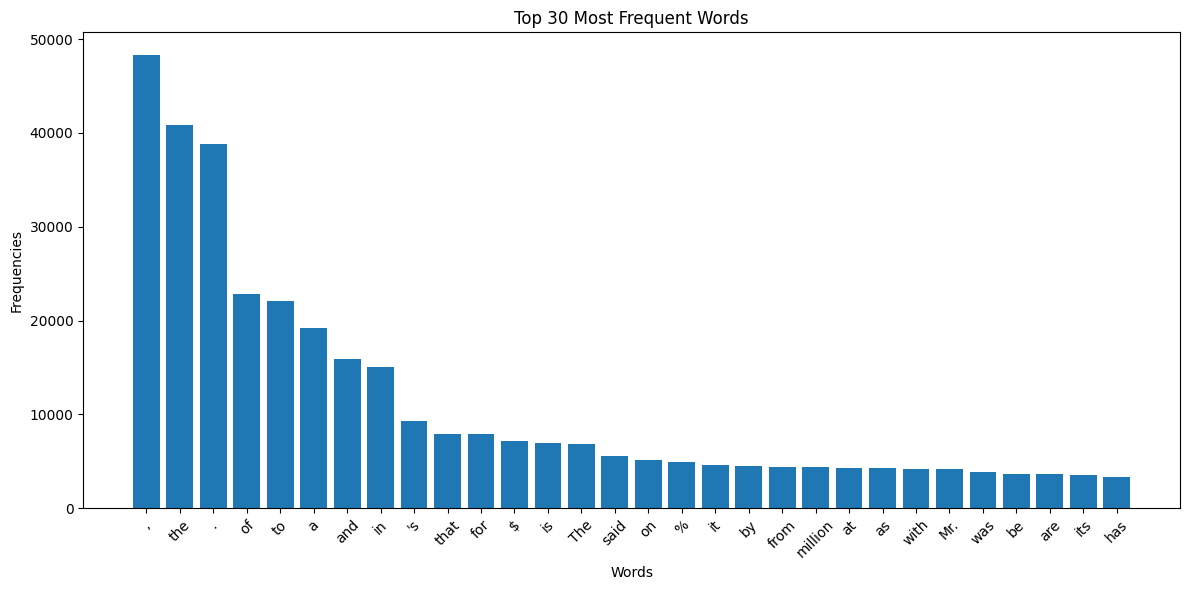

Frequency of the 1st word: 48310
Frequency of the 2nd word: 40839
Frequency of the 3rd word: 38798
Frequency of the 4th word: 22782


In [ ]:
## YOUR CODE HERE ##

# Per each word, we have the frequency
# Per rank, re order the words based on their frequency (descending order)
top_n = 30

data = word_freq.most_common(top_n)
words, freqs = zip(*data)


# Plot graph of word frequency versus rank of a word

plt.figure(figsize=(12, 6))
plt.bar(words, freqs)
plt.xticks(rotation=45)
plt.title(f"Top {top_n} Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequencies")
plt.tight_layout()
plt.show()

# Print frequency 1st, 2nd, 3rd, 4th,
print(f"Frequency of the 1st word: {freqs[0]}")
print(f"Frequency of the 2nd word: {freqs[1]}")
print(f"Frequency of the 3rd word: {freqs[2]}")
print(f"Frequency of the 4th word: {freqs[3]}")

█████ ANSWER UNDER THIS LINE █████

The corpus doesn't seem to obey to Zipf's law.

Zipf's law states that the frequency of a word is inversely proportional to its rank in the frequency table. In simpler terms, the most frequent word  will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, and so on.

In this case, we can see that the most frequent word occur 48310 times, which is not the double of the frequency of the second word (4083).
The same happens between the first (48310) and the third word (38798): the first one is not three times larger than the third one.


### (b) Tags & tokens [5pt]

**Print** a list of the **10 most commonly occurring POS tags** in the data. For each of these POS tags, additionally **print** the **3 most common token types** (i.e., words) that belong to that tag. Print raw counts for each printed tag and token type.

In [ ]:
## YOUR CODE HERE ##
# Use the following printing format and test your numbers for the DT pos tag:
# DT (82147):	the(40831); a(19151); The(6753)

# Compute the total amount of tokens for each POS tag
pos_counts = {pos: sum(counter.values()) for pos, counter in pos_freq.items()} # Use pos_freq from Ex 1.1 (a)

# Get the most frequent 10 tags
top_pos = sorted(pos_counts.items(), key=lambda x: x[1], reverse=True)[:10]

for pos, total in top_pos:
    # Get the 3 most frequent tokens for that tag
    top_three = [f"{word}({count})" for word, count in pos_freq[pos].most_common(3)]

    # Save the tokens in a string
    top_three_str = "; ".join(top_three)
    print(f"{pos} ({total}): {top_three_str}")


NN (132134): %(4866); company(2457); year(2220)
IN (99413): of(22778); in(14852); for(7907)
NNP (90711): Mr.(4147); U.S.(1577); Corp.(1186)
DT (82147): the(40831); a(19151); The(6753)
JJ (59643): new(1396); other(1298); last(990)
NNS (59332): years(1164); shares(1128); sales(939)
, (48314): ,(48310); an(1); 2(1)
. (39252): .(38798); ?(392); !(62)
CD (36148): million(4355); billion(1780); one(1203)
RB (30232): n't(3211); also(1420); not(1287)


### (c) Ambiguity [6pt]

A single token type (i.e. word) may occur with several POS tags. For example, *record* can be both a **noun** *(buy a record)* or a **verb** *(record a lecture)*. This makes POS tags extremely useful for **disambiguation**.

**Print** the percentage(!) of the **ambiguous** words in the vocabulary(!) (i.e. token types that have more than one POS tag?).  

Ambiguous words do not account for a great percentage of the vocabulary. Yet they are among the most commonly occurring words in the English language.  
**Print** the percentage of the dataset that is ambiguous (i.e., counting tokens of ambiguous token types/words wrt data size).  
(Don't round percentages when printing)

**Print** the **10 most frequently shared POS tag pairs** (i.e. POS tag pairs that share most words).  
**Print** the **4 most ambiguous** words (i.e. based on the number of POS tags it can get)

In [ ]:
## YOUR CODE HERE ##
# TEST: There are 1060 token types whose tokens get both ('VBD', 'VBN') tags
# TEST: in other words, a set of tokens with VBD and a set of tokens with VBN share 1060 elements

# print in the following way:
# Print ambiguous tokens and tag pairs as, where tags are ordered alphabetically:
# Top 10 confused tag pairs:
#	('VBD', 'VBN') share 1060 tokens
#   ...
#
# Top 4 ambiguous tokens:
# 	token: [POS_1, ..., POS_n]
#   ...

from collections import defaultdict
import itertools

# Step 1: Build a map from tokens to all their associated tags
token_to_tags = defaultdict(set)
token_counts = Counter()
total_tokens = 0

with open(PTB_FILES['train'], 'r') as f:
    for line in f:
        # Skip empty lines
        if not line.strip():
            continue

        # Remove leading/trailing whitespace and split the line into a list of strings
        pairs = line.strip().split()

        # Iterate through each of those word–tag pair strings.
        for pair in pairs:
            if '|' not in pair:
                continue  # skip malformed pairs

            # Split the word|tag pair into word and tag using rsplit (from the right)
            word, tag = pair.rsplit('|', 1)

            # Add this POS tag to the set of tags associated with the current token type (word)
            token_to_tags[word].add(tag)

            # Count how many times this token (word) appears in total
            token_counts[word] += 1

            # Increment the total number of tokens seen in the dataset
            total_tokens += 1

# Step 2: Identify ambiguous tokens
# Create a set of tokens that have more than one POS tag (i.e., are ambiguous)
ambiguous_tokens = {token for token, tags in token_to_tags.items() if len(tags) > 1}
ambiguous_token_count = len(ambiguous_tokens)
vocab_size = len(token_to_tags)

# Step 3: Percentage of vocabulary that is ambiguous
percent_ambig_vocab = (ambiguous_token_count / vocab_size) * 100

# Step 4: Percentage of the dataset (tokens) that are ambiguous
# Sum up the total number of token instances (not types) in the dataset that are ambiguous
# i.e., count how many times ambiguous words actually appear in the corpus
ambiguous_token_instance_count = sum(token_counts[token] for token in ambiguous_tokens)
percent_ambig_dataset = (ambiguous_token_instance_count / total_tokens) * 100

print(f"Percentage of ambiguous token types in vocabulary: {percent_ambig_vocab} %")
print(f"Percentage of corpus tokens that are ambiguous: {percent_ambig_dataset} %")

# Step 5: Find POS tag pairs that share the most tokens
# Build a reverse map: tag -> set of tokens
tag_to_tokens = defaultdict(set)
for token, tags in token_to_tags.items():
    for tag in tags:
        tag_to_tokens[tag].add(token)

# Now get all unique tag pairs and count how many tokens they share
pair_counts = []

# Get a sorted list of all POS tags
tag_list = sorted(tag_to_tokens.keys()) # List to store (tag pair, number of shared tokens)
for t1, t2 in itertools.combinations(tag_list, 2):
    # Find the intersection (shared tokens) between the two POS tag sets
    shared = tag_to_tokens[t1] & tag_to_tokens[t2]
    # Append the tag pair and the number of shared tokens to the list
    pair_counts.append(((t1, t2), len(shared)))

# Sort and get top 10 tag pairs
top_pairs = sorted(pair_counts, key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 confused tag pairs:")
for (t1, t2), count in top_pairs:
    print(f"\t({t1!r}, {t2!r}) share {count} tokens")

# Step 6: Top 4 most ambiguous tokens (by number of POS tags)
top_ambiguous = sorted(token_to_tags.items(), key=lambda x: len(x[1]), reverse=True)[:4]

print("\nTop 4 ambiguous tokens:")
for token, tags in top_ambiguous:
    tag_list = sorted(tags)
    print(f"\t{token}: {tag_list}")


Percentage of ambiguous token types in vocabulary: 13.469803211942999 %
Percentage of corpus tokens that are ambiguous: 55.079005800643756 %

Top 10 confused tag pairs:
	('VBD', 'VBN') share 1060 tokens
	('JJ', 'NN') share 962 tokens
	('NN', 'VB') share 775 tokens
	('VB', 'VBP') share 752 tokens
	('NN', 'NNP') share 627 tokens
	('JJ', 'VBN') share 456 tokens
	('NN', 'VBP') share 403 tokens
	('NN', 'VBG') share 378 tokens
	('NNS', 'VBZ') share 364 tokens
	('JJ', 'NNP') share 297 tokens

Top 4 ambiguous tokens:
	set: ['JJ', 'NN', 'VB', 'VBD', 'VBN', 'VBP', 'VBZ']
	many: ['DT', 'JJ', 'NN', 'NP', 'PDT', 'RB', 'VB']
	open: ['JJ', 'NN', 'RB', 'RP', 'VB', 'VBP', 'VBZ']
	down: ['IN', 'JJ', 'NN', 'RB', 'RBR', 'RP', 'VBP']


### (d) Explain [6pt]

**Take one** of the 4 most ambiguous words and for **each** of its possible POS tags **give** a sentence/phrase from the **training data** that shows the use of the token with its POS tag.  
For the other **three** words, **pick** one POS tag that seems to you least likely for the word and give the corresponding sentence/phrase from the training data.  
From these seven examples, **discuss** those that you find it somewhat surprisong or unexpected, supporting your response with reasoning.      
Consult [Figure 17.2](https://web.stanford.edu/~jurafsky/slp3/17.pdf#page=4) for the interpretation of the POS tags. If you would like a more detailed explanation of the POS tags, consult [this technical report](http://www.cs.cmu.edu/afs/cs/Web/People/dgovinda/pdf/semantics/tagguide.pdf). Of course, you don't need to read it entirely, just use it to search for certain POS tags in it.

In [ ]:
# Optional code cell for searching certain toke-tag pairs in the training data

import re

# Set the word you want to search for
search_word = ' open|RP'  # Example word to search for

# Open the training file from PTB_FILES
with open(PTB_FILES['train'], 'r') as f:
    sentences = f.read().splitlines()  # Read file and split into lines (sentences)

# List to store sentences that contain the search word
matching_sentences = []

# Loop over each sentence in the corpus
for sentence in sentences:
    # # Check if the search word is in the sentence (case-insensitive search)
    # if search_word.lower() in sentence.lower():
    #     matching_sentences.append(sentence)  # Add sentence to the list

    # Check if the search word is in the sentence (case-sensitive search)
    if search_word in sentence:
        matching_sentences.append(sentence)  # Add sentence to the list

# Display the matching sentences
for sentence in matching_sentences:
    print(sentence)

Perhaps|RB most|RBS exciting|JJ ,|, the|DT device|NN is|VBZ thrusting|VBG open|RP a|DT window|NN to|TO the|DT workings|NNS of|IN the|DT brain|NN .|. 
All|DT major|JJ roadways|NNS except|IN Interstate|NN 880|CD ,|, known|VBN as|IN the|DT Nimitz|NNP Freeway|NNP ,|, and|CC the|DT Bay|NNP Bridge|NNP were|VBD open|RP by|IN 1|CD p.m.|RB yesterday|NN .|. 
The|DT court|NN left|VBD open|RP whether|IN FERC|NNP could|MD reimpose|VB a|DT new|JJ deadline|NN later|RB .|. 


█████ ANSWER UNDER THIS LINE █████

**Ambiguous token, chosen: 'set'**

| POS Tag | Example Sentence/Phrase | Interpretation |
|---------|--------------------------|----------------|
| **JJ** (Adjective) | "...at a **set** price..." | Describes a fixed, predetermined price. |
| **NN** (Noun) | "We cruise toward another **set** of pilings." | Refers to a group or collection of items. |
| **VB** (Verb, base form) | "...power to **set** margin requirements." | Infinitive/command verb form. |
| **VBD** (Verb, past tense) | "The court **set** a hearing..." | Past tense verb. |
| **VBN** (Verb, past participle) | "Budget is **set** at $1.5 million." | Used in passive construction. |
| **VBP** (Verb, non-3rd person singular present) | "...they **set** up shop." | Present tense with plural subject. |
| **VBZ** (Verb, 3rd person singular present) | "...SEC **set** standards..." | Likely a tagging error; "set" should be base form (VB), not VBZ. |

<br>

---

<br>

**One Unusual POS Tag Example for Each of the Other Words**

1. **many** — VB (Verb, base form)

  **Example:** "Like **many** of his colleagues, he did n't serve in Vietnam in the 1960s yet embraced a hawkish defense and foreign policy..."

  **Explanation:** This seems to be a  tagging error, probably due to automated annotation.

2. **open** — RP (Particle)

  **Example:** "...thrusting **open** a window to the workings of the brain."
  
  **Explanation:** "Open" is used as a **particle** (RP), part of a phrasal verb "thrust open". Less common POS, but correct in this construction. Demonstrates flexibility of "open".

3. **down** — JJ (Adjective)

  **Example:** "Other senators want to lower the **down** payments required..."
  
  **Explanation:** In this sentence, "down" is used to describe the type of "payments." This usage aligns with the adjectival function of modifying a noun.


The tokens that appear to be surprising or unexpected are:<br>

*   **Many:** It's surprising it has 7 different tags, since it is mainly known as determinant (DT) or adjective. The fact the tags verb (VB) or adverb (RB) are associated to it is unexpected. Instead the classification as noun (NN) or (NP) can be due to the fact that the word many appears with other nouns.
*   **Open:** It is expected to be an adjective (JJ) or a verb (VB) but it has been also classified as noun (NN), adverb (RB), particle (RP), and conjugated verbs (VBP, VBZ), which are unexpected for this word, even though it also reflects its grammatical flexibility.




## Ex 1.2 [8pt]

You are also provided with another file called **sec00.gold.tagged**.
Section 00 of the Penn Treebank is typically used as development data.

### (a) Unseen % [5pt]

**Print** the percentages and the raw count of the **unseen development vocabulary** and **unseen development data** (i.e., token types and tokens that occur in the development data but not in the training data). Percentages should be calculated wrt the development vocabulary/data size and they shouldn't be rounded.

In [ ]:
## YOUR CODE HERE ##
# Use PTB_FILES global var
# print as
# Unseen vocab percentage = X1% (X2)
# Unseen data percentage = Y1% (Y2)
# TEST: Difference between the percentages (X1-Y1) should be in the interval 10-15%

dev_vocab = set()
dev_token_count = 0
unseen_token_count = 0
# Counter for unseen tokens by POS tag
unseen_pos_counter = Counter()

# Open and read the training file from the PTB corpus
with open(PTB_FILES['dev'], 'r', encoding='utf-8') as dev_file:
    for line in dev_file:
        if line.strip():
            pairs = line.strip().split()
            for pair in pairs: # a pair is a token with its POS tag
                if '|' not in pair:
                    continue
                token, pos = pair.rsplit('|', 1) # extract the token and the pos tag from each pair
                dev_vocab.add(token)
                dev_token_count += 1
                if token not in vocabulary_original: # get vocabulary_original from Ex 1.1 (a)
                    unseen_token_count += 1
                    unseen_pos_counter[pos] += 1

unseen_vocab = dev_vocab - vocabulary_original
unseen_vocab_count = len(unseen_vocab)

unseen_vocab_pct = (unseen_vocab_count / len(dev_vocab)) * 100
unseen_data_pct = (unseen_token_count / dev_token_count) * 100

print(f"Unseen vocab percentage = {unseen_vocab_pct}% ({unseen_vocab_count})")
print(f"Unseen data percentage = {unseen_data_pct}% ({unseen_token_count})")

diff = unseen_vocab_pct - unseen_data_pct
print(f"Difference = {diff}%")


Unseen vocab percentage = 16.34932724041635% (1288)
Unseen data percentage = 3.804323895909471% (1728)
Difference = 12.54500334450688%


### (b) Unseen tok tag [3pt]

**Print** the top **five** POS tags that the most **unseen tokens** belong to.

In [ ]:
## YOUR CODE HERE ##
# Print in the following format:
# POS_tag (the_number_of_corresponding_unseen_tokens)

# Get top 5 POS tags by number of unseen tokens
top5_unseen_pos = unseen_pos_counter.most_common(5) # get unseen_pos_counter from Ex 1.2 (a)

# Print
for pos, count in top5_unseen_pos:
    print(f"{pos} ({count})")

NNP (815)
JJ (258)
NN (210)
NNS (146)
CD (114)


## Work description for Ex 1

**Ex 1.1:**

**(a) Corpus & Vocab:**
We extracted tokens, creating separate lists for tokens with and without lowercasing to compare vocabulary sizes.

**(b) Tags & Tokens:**
We used a Counter to track tag counts and constructed a map from POS tags to the tokens associated with each tag to find the most common tokens associated with each tag. The challenge here was organizing the data efficiently to avoid redundant computations.

**(c) Ambiguity:**
This part was more complex. We first built a map from tokens to their POS tags (`token_to_tags`), then reversed it to map tags to tokens (`tag_to_tokens`). We used `token_to_tag` to find the percentage of the ambiguous tokens/token types and the most ambiguous word. We used the `tag_to_tokens` map to identify POS tag pairs sharing the most words.

**(d) Explain:**
We searched the training data for sentences containing specific ambiguous words (e.g., "set") to illustrate their usage with different POS tags. The surprising cases (e.g., "set" as VBZ) were analyzed, revealing potential tagging errors or rare usages.

**Ex 1.2:**

**(a) Unseen %:**
We extracted vocabulary and tokens from both training and development datasets, then computed the percentage of token types and tokens that occur in the development set but not in the training set. The main challenge was ensuring the correct calculation of the percentages.

**(b) Unseen Tok Tag:**
Using a Counter, we tracked the POS tags of unseen tokens in the development set to find the top five POS tags that the most unseen tokens belong to.

**Assistance and Tools:**
- Throughout the exercise, we used GenAI as a supportive tool. For instance, in Exercise 1.1 (c), we sought assistance in how to approach the problem and ended up reversing the token-to-tag map as an efficient method to solve it. GenAI helped with the syntax of specific code snippets, such as set intersections, sorting and selecting most common elements from a counter.</font>

- The TAs also provided guidance when needed. For example, we asked the TA for Ex 1.1 (b) if `,` and `.` are POS tags, which he confirmed they were.

# 2. Language Models



The following questions presuppose J&M's [chapter 3 on n-gram language models](https://web.stanford.edu/~jurafsky/slp3/3.pdf).

Models that assign **probabilities** to **sequences of words** are called **language
models** or **LMs**. The simplest model that assigns probabilities to sentences and sequences of words is the **N-gram** model.

Recall that an *N*-gram language model uses **conditional probabilities** of the form
    
$$P(w_k \mid w_{k-N+1} \dots w_{k-1})$$

to **approximate** the full **joint probability**

$$P(w_1 \dots w_n)$$

of a sequence of words $w_1 \dots w_n$.

The easiest way of obtaining estimates for the probabilities $P(w_k \mid w_{k-N+1} \dots w_{k-1})$ is to use the **maximum likelihood estimate** or **MLE**, a widely used statistical estimation method ([read more](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation)). You count and normalize:

$$P_{MLE}(w_k \mid w_{k-N+1} \dots w_{k-1}) = \frac{C(w_{k-N+1} \dots w_{k-1} w_k)}{C(w_{k-N+1} \dots w_{k-1})}.$$

## Ex 2.1 [15pt]

In this exercise you will have to train $N$-gram language models with an optional smoothing.

#### Some help

The `collections` library has another useful data structure: the `defaultdict`. Some example uses (learn more [here](https://realpython.com/python-defaultdict/) if needed):

**[Datastructure hint]** If you store the smoothed language in a naive manner (that is, to store *all* the numbers separately) your datastructure will get huge! If $V$ is the vocabulary then the smoothed bigram model assigns probabilities to $|V|^2$ entries. If $|V|$ is around 80k, the naive way requires you to store more than 64 billion floats. Yet almost all of these are actually just $P(w_n|w_{n-1}) = \frac{k}{N + k|V|}$, with $k$ the value with which you smooth and $N=C(w_{n-1})$. Think about how you use this fact to make your model work in practice.

In [ ]:
from collections import defaultdict

d = defaultdict(float)
d["new key"]

0.0

Compare that to an ordinary dictionary:

In [ ]:
# od = dict()
# od["new key"]
# Throws an KeyError: 'new key'

Other datatypes as `default_factory`:

In [ ]:
d = defaultdict(int)
print(d)
print(d["new key"])
print(d)

defaultdict(<class 'int'>, {})
0
defaultdict(<class 'int'>, {'new key': 0})


In [ ]:
d = defaultdict(list)
print(d)
print(d["new key"])
print(d)

defaultdict(<class 'list'>, {})
[]
defaultdict(<class 'list'>, {'new key': []})


Note how the defaultdict is modified after getting a value of a non-existing key. If you want to avoid modifying the defaultdict when getting a value for a non-existing key, do the following:

In [ ]:
d = defaultdict(list)
print(d)
print(d.get("new key", d.default_factory()))
print(d)

defaultdict(<class 'list'>, {})
[]
defaultdict(<class 'list'>, {})


Converting an already existing `dict`:

In [ ]:
d1 = {k: "value" for k in range(1, 11)}
d = defaultdict(float, d1) # convert it to a defaultdict
print(d[5])
print(d[100])

value
0.0


This doesn't work:

In [ ]:
# d = defaultdict(10)
# Throws a TypeError: first argument must be callable or None

Use a `lambda` to make the number `10` `callable`":

In [ ]:
d = defaultdict(lambda: 10)
print(d)
print(d["new key"])
print(d)

defaultdict(<function <lambda> at 0x7c81fe525da0>, {})
10
defaultdict(<function <lambda> at 0x7c81fe525da0>, {'new key': 10})


In [ ]:
d = defaultdict(lambda: defaultdict(float))
print(d)
print(d["new key"])
print(d)

defaultdict(<function <lambda> at 0x7c81fe525f80>, {})
defaultdict(<class 'float'>, {})
defaultdict(<function <lambda> at 0x7c81fe525f80>, {'new key': defaultdict(<class 'float'>, {})})


Note that in some cases the behaviour of lambda functions might be counterintuitive. One of such cases is the closure: [link1](https://realpython.com/python-lambda/#closure), [link2](https://stackoverflow.com/questions/2295290/what-do-lambda-function-closures-capture).

In [ ]:
# making a shortcut for the read-only get for defaultdict that supports several keys
# i.e. defget(d, [k1, k2]) will return the value of d[k1][k2] without altering d
def defget(d, keys):
    for k in keys:
        d = d.get(k, d.default_factory() if isinstance(d, defaultdict) else 0)
    return d

# testing if it works as intended
d = defaultdict(lambda: defaultdict(int))
d[1][1] = 2
d[2][1] = 3
print(d)
print(defget(d, [1, 1]))
print(defget(d, [3]))
print(defget(d, [3, 1]))
print(d)

defaultdict(<function <lambda> at 0x7c81fe525580>, {1: defaultdict(<class 'int'>, {1: 2}), 2: defaultdict(<class 'int'>, {1: 3})})
2
defaultdict(<class 'int'>, {})
0
defaultdict(<function <lambda> at 0x7c81fe525580>, {1: defaultdict(<class 'int'>, {1: 2}), 2: defaultdict(<class 'int'>, {1: 3})})


Clever use of a `defaultdict` can be the solution to the problem of data-storing in a smoothing $N$-gram pointed out above:
    
    d = bigram_frequencies[history] = {w1: 120, w2: 340, w3: 7 ...}
    N = sum(d.values())
    # d_normalized = .... # normalize d with smoothing applied to elements already in the dictionary  
    d_smoothed = defaultdict(lambda: k/(N + kV), d_normalized) # add smoothing to 'unseen' words

The following function is given to assist you with reading the data from the file in a convenient format. Understand how the function works and figure out how to use it for training n-grams.

Note that the function uses padding symbols `<s>` and `</s>` to mark sentence boundaries. **Include `</s>` in the vocabulary (for unigram models too)** which will serve as an indicator of stopping the sentence generation when doing word-by-word sampling (Ex 2.2).

In [ ]:
def read_data(fname, h=1, max_lines=np.inf):
    """
    Reads in the data from a file and returns a vocabulary as a set
    and the sentence-padded data as a list of list.

    :param fname: path to the file
    :param max_lines: the number of top lines to read (can be used for debugging)
    :param h: the length of n-gram history
    :returns: data as a list of lists and vocabulary as a set
    """
    data = []
    start = h * ["<s>"]
    end = ["</s>"]

    with open(fname, "r") as F:
        for k, line in enumerate(F):
            # an optional cut-off to read a part of the data
            if k > max_lines:
                break
            words = line.strip().split()
            # padding the sentence
            sent = start + words + end #also adding the ending for unigrams to capture most likley stopping time when generating the sentences
            data.append(sent)
    return data

### train_ngram

**Complete** the function `train_ngram` so that you can train a count-based $N$-gram language model on the data found in `data/ted-train.txt` and train this for $N=2,3$.

**Extend** the function `train_ngram` so that it accepts a parameter `k` for optional add-$k$ smoothing (upgrade the same function, don't define new). For smoothing, in case of histories unseen in the data, use the unigram model instead of the uniform distribution.

Note that `ngram` should be a defaultdict of defaultdict because it should return a value for any history and for any next word combination. However, `unigram` need to be a defaultdict with float values as it takes no history into account.

In [ ]:
def train_ngram(data, N=2, k=0):
    """
    Trains an n-gram language model with optional add-k smoothing
    and additionally returns the unigram model

    :param data: text-data as returned by the pre-defined function read_data
    :param N: (N>1) the order of the ngram e.g. N=2 gives a bigram
    :param k: optional add-k smoothing
    :returns: ngram and unigram
    """
    # ngram[history][word] = #(history,word)
    # for history of length >1, join tokens with a singel white space (see tests below)

    ## YOUR CODE HERE ##
    ## you can have auxiliary functions if needed, inside this function

    # Initialize the ngram and unigram models as defaultdict of defaultdicts
    ngram = defaultdict(lambda: defaultdict(int))  # To store counts of N-grams
    unigram = defaultdict(int)  # To store counts of unigrams

    total_counts = defaultdict(int) # To store the total count of each history

    # Iterate over each sentence in the data
    for sentence in data:
        # Create n-grams for the given sentence (including padding)
        for i in range(len(sentence) - N + 1):
            history = ' '.join(sentence[i:i+N-1]) # (N-1)-gram history
            word = sentence[i + N - 1]  # The N-th word

            ngram[history][word] += 1  # Increment count of N-gram

            unigram[word] += 1  # Increment count of unigram

            total_counts[history] += 1 # Increment the total number of times this 'history' occurred

    # The number of different words in the data
    vocab_size = len(unigram)

    # Creates a function that returns the default smoothed probability
    # for any unseen word, based on add-k smoothing.
    def create_default_probability(k, total_count, vocab_size):
        return lambda: k / (total_count + k * vocab_size)

    # Define the corresponding default probability for all the possible unseen histories/words
    for history in ngram:
        total_count = total_counts[history]
        for word in ngram[history]:
            ngram[history][word] = (ngram[history][word] + k) / (total_count + k*vocab_size)

        # Any unseen words (not seen during training for this specific history) will have a default probability assigned
        ngram[history] = defaultdict(create_default_probability(k, total_count, vocab_size), ngram[history])

    # BOS and EOS are not considered for the unigram. Not valuable information.
    total_count_unigram = sum(unigram[word] for word in unigram if word != '<s>' and word != '</s>')

    # Get the smoothed unigram (add default smoothed probability for unkwown words)
    smoothed_unigram = defaultdict(create_default_probability(k, total_count_unigram , vocab_size ))
    for word in unigram:
        smoothed_unigram[word] = (unigram[word] + k) / (total_count_unigram + k*vocab_size)

    return ngram, smoothed_unigram


In [ ]:
# This shouldn't take more than 2min

# Prepare data
Data1 = read_data(TED_FILES['train'], h=1)  # h=1 because we're working with bigrams (2-grams), meaning history of length 1

# non-smoothed bigram
Bigram, Unigram = train_ngram(Data1, N=2, k=0)

# smoothed bigram
Bigram_sm, Unigram_sm = train_ngram(Data1, N=2, k=1)


In [ ]:
# Running this might take significant amount of memory
# Runtime shouldn't take more than 3min

# Prepare data for trigram
Data2 = read_data(TED_FILES['train'], h=2)  # h=2 because we're working with trigrams (3-grams), meaning history of length 2

# non-smoothed trigram
Trigram, Unigram_ = train_ngram(Data2, N=3, k=0)
# smoothed trigram
Trigram_sm, Unigram_sm_ = train_ngram(Data2, N=3, k=1)

In [ ]:
#TEST 2.1
# Be aware that when getting a value of a non-existing key from defaultdict with d[key] method,
# the key gets inserted into the defaultdict. That's why tests use defget
assert defget(Bigram, ['all','people']) > 0
assert defget(Bigram, ['all','all']) == 0
assert defget(Bigram_sm, ['all','all']) == defget(Bigram_sm, ['all','asdasda'])
assert defget(Bigram_sm, ['all','asdasda']) > 0
assert defget(Trigram, ['<s> <s>','The']) > 0
assert defget(Trigram, ['<s> <s>','sun']) == 0
assert np.isclose(sum(Trigram['All the'].values()), 1) #almost 1, but not 1 because of float point rounding
assert defget(Trigram_sm, ['<s> <s>','sun']) > 0
assert defget(Unigram, ['</s>']) > 0
assert Unigram == Unigram_
assert Unigram_sm == Unigram_sm_

## Ex 2.2 [5pt]

You can use an *N*-gram language model to **generate text**. The higher the order *N* the better your model will be able to catch the long-range dependencies that occur in actual sentences and the better your chances are at generating sensible text. But beware: **sparsity** of language data will quickly cause your model to reproduce entire lines from your training data; in such cases, only one $w_k$ was observed for the histories $w_{k-N+1}\dots w_{k-1}$ in the entire training set.

### Some help

**[Hint]** You can use the method of [inverse transform sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling) to generate a sample from a **categorical distribution**, $p_1\dots p_k$ such that $p_i \geq 0$ and $\sum_{i=1}^k p_i = 1$, as follows:

In [ ]:
import random

P = [0.2,0.5,0.2,0.1]

def sample(P):
    u = random.random() # random number between 0 and 1
    p = 0
    for i, p_i in enumerate(P):
        p += p_i
        if p > u:
            return i # the first i s.t. p1 + ... + pi > u

print(sample(P))

print(Counter([sample(P) for i in range(1000)])) # check to see if the law of large numbers is still true

0
Counter({1: 497, 0: 218, 2: 195, 3: 90})


Inverse transform sampling in the words of Jurafsky and Martin:

> Imagine all the words of the English language covering the probability space
between 0 and 1, each word covering an interval proportional to its frequency. We
choose a random value between 0 and 1 and print the word whose interval includes
this chosen value.

(J&M, [section 3.3](https://web.stanford.edu/~jurafsky/slp3/3.pdf#page=10))

### generate_sent

**Complete** the function `generate_sent`. It takes a language model `lm` and an order `N` and should generate a **natural language string(!)** (it shouldn't contain padding symbols and might not be a grammatical sentence) by **sampling** from the language model.

In [ ]:
def generate_sent(lm, N):
    """
    Generates sentence from a language model based on N-grams
    :param lm: language model based on N-grams
    :param N: denoting N-gram parameter
    :returns: a string of natural language text
    """

    ## YOUR CODE HERE ##
    ## you can have auxiliary functions if needed, inside of outside this function's scope
    history = ['<s>'] * (N - 1)
    sentence = []

    while True:
        hist_key = ' '.join(history)
        next_words = lm.get(hist_key, {})
        if not next_words:
            break  # No next words found, end the sentence

        words = list(next_words.keys())
        probs = list(next_words.values())

        # Normalize probabilities to ensure they sum to 1
        total_prob = sum(probs)
        if total_prob == 0:
            break  # Avoid division by zero
        probs = [p / total_prob for p in probs]

        # Sample the next word using the provided sample function
        next_word = words[sample(probs)]
        if next_word == '</s>':
            break
        sentence.append(next_word)
        history = history[1:] + [next_word]

    return ' '.join(sentence)
    raise NotImplementedError("Function not implemented yet")

In [ ]:
#TEST Ex2.2
random.seed(2025) #uncommnet if you want to make the output non-deterministic

print("Bigram:\n")
print("\n".join([generate_sent(Bigram, 2) for _ in range(5)]))

print("\nTrigram:\n")
print("\n".join([generate_sent(Trigram, 3) for _ in range(5)]))

Bigram:

So this because I 'm bound in the night , he presented today .
So that I see me descriptions like an origin of fixing bridges .
In our millennial generation , ecology , I decided I swear I 'd ask , every apartment .
If they allow him in her up .
The answer is more .

Trigram:

Now , how did I choose the spoken word that I could be an independent newspaper , no , no problem .
I saw this , and to start with us , not what I told you earlier -- that Winnie Mandela .
' My buddy .
Every old curator who 'd gone about as accurately as possible , are you .
♫ Sweeney : Oh , the fight for your attention .


### [Extra]
No points for this

For how many of the histories $w_{k-N+1}\dots w_{k-1}$ is the number of continuations $w_n$ equal to **one**? Calculate the percentage of such cases for the different orders *N*.

And which history has the **most possible continuations**?

In [ ]:
## YOUR CODE HERE ##

def analyze_ngram_model(lm):
    total_histories = len(lm)
    one_continuation = sum(1 for history in lm if len(lm[history]) == 1)
    max_continuations = max(len(lm[history]) for history in lm)
    most_variable_histories = [history for history in lm if len(lm[history]) == max_continuations]

    percent_single_continuation = (one_continuation / total_histories) * 100

    print(f"Total histories: {total_histories}")
    print(f"Histories with only one continuation: {one_continuation} ({percent_single_continuation:.2f}%)")
    print(f"Max number of continuations for a single history: {max_continuations}")
    print(f"History/histories with most continuations: {most_variable_histories[:5]}")  # show only first 5 if many

# Apply this to each of the models
print("Bigram Analysis:")
analyze_ngram_model(Bigram)

print("\nSmoothed Bigram Analysis:")
analyze_ngram_model(Bigram_sm)

print("\nTrigram Analysis:")
analyze_ngram_model(Trigram)

print("\nSmoothed Trigram Analysis:")
analyze_ngram_model(Trigram_sm)


Bigram Analysis:
Total histories: 77806
Histories with only one continuation: 37166 (47.77%)
Max number of continuations for a single history: 19019
History/histories with most continuations: ['the']

Smoothed Bigram Analysis:
Total histories: 77806
Histories with only one continuation: 37166 (47.77%)
Max number of continuations for a single history: 19019
History/histories with most continuations: ['the']

Trigram Analysis:
Total histories: 901820
Histories with only one continuation: 648435 (71.90%)
Max number of continuations for a single history: 9058
History/histories with most continuations: ['<s> <s>']

Smoothed Trigram Analysis:
Total histories: 901820
Histories with only one continuation: 648435 (71.90%)
Max number of continuations for a single history: 9058
History/histories with most continuations: ['<s> <s>']


█████ ANSWER UNDER THIS LINE █████

**Bigram Analysis**
- The number of histories with only one continuation: 37166
- Its percentage is 47.77%
- The history with the most possible continuations is $['the']$.

**Smoothed Bigram Analysis**
- The number of histories with only one continuation: 37166
- Its percentage is 47.77%
- The history with the most possible continuations is $['the']$.

**Trigram Analysis**
- The number of histories with only one continuation: 648435
- Its percentage is 71.90%
- The history with the most possible continuations is $['<s> <s>']$.

**Smoothed Trigram Analysis**
- The number of histories with only one continuation: 648435
- Its percentage is 71.90%
- The history with the most possible continuations is $['<s> <s>']$.

## Ex 2.3 Train sent. prob. [5pt]

**Recall** that if we have a sentence $w_1,\dots,w_n$ we can write

$$P(w_1\dots w_n) = P(w_1)P(w_2|w_1) \cdots P(w_n|w_1 \dots w_{n-1}) \approx P(w_1)P(w_2|w_1)\cdots P(w_n|w_{n-(N-1)}\dots w_{n-1})\prod_{i=1}^{n} P(w_i|w_{i-(N-1)}\dots w_{i-1})$$

where in the last step we make an $N$-gram approximation of the full conditionals.

For example, in the case of a bigram (N=2), the above expression reduces to

$$P(w_1 \dots w_n)\approx P(w_1)\prod_{i=2}^{n} P(w_i| w_{i-1}).$$

The following sentences are taken from the **training data**. Use your **unsmoothed unigram**, **bigram**, and **trigram** language model to estimate their **probabilities**:

    1. Every day was about creating something new .
    2. In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought together in a collision , producing a burst of pure energy .

In [ ]:
def sent_prob(sent, lm, N):
    """
    Calculates probability of sent based on the N-gram language mode lm
    :param sent: tokenized sentence string
    :param lm: N-gram language model
    :param N: N-gram size
    :returns: probabilitity number
    """
    ## YOUR CODE HERE ##

    tokens = ["<s>"] * (N - 1) + sent.split() + ["</s>"]
    prob = 1.0

    if N == 1:
        # for word in tokens
        for word in sent.split():
            prob *= lm[word]
    else:
        for i in range(N - 1, len(tokens)):
            history = " ".join(tokens[i - (N - 1):i])
            word = tokens[i]
            prob *= lm[history][word]

    return prob

In [ ]:
# Print all the abovemnetioned probabilities (NOT log probabilities).
# The cell output should make it clear what number stands for which probability.
# Reuse the variables Unigram, Unigram_sm, Bigram, Bigram_sm, Trigram, and Trigram_sm.
# Note that sent_prob should take a sentence input as a string, not as a list.

Sents_from_train = (
    "Every day was about creating something new .",
    "In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought together in a collision , producing a burst of pure energy ."
)

## YOUR CODE HERE ##

models = {
    "Unigram": Unigram,
    "Smoothed Unigram": Unigram_sm,
    "Bigram": Bigram,
    "Smoothed Bigram": Bigram_sm,
    "Trigram": Trigram,
    "Smoothed Trigram": Trigram_sm
}

N_values = {
    "Unigram": 1,
    "Smoothed Unigram": 1,
    "Bigram": 2,
    "Smoothed Bigram": 2,
    "Trigram": 3,
    "Smoothed Trigram": 3
}

print("============ Train Sentence Probabilities ============\n")

for i, sent in enumerate(Sents_from_train, 1):
    print(f"Sentence {i}: {sent}\n")
    for model_name, lm in models.items():
        N = N_values[model_name]
        prob = sent_prob(sent, lm, N)
        print(f"{model_name:<20}: {prob}")
    print("\n" + "-"*60 + "\n")

============ Train Sentence Probabilities ============

Sentence 1: Every day was about creating something new .

Unigram             : 8.595078506696817e-24
Smoothed Unigram    : 7.648867915797733e-24
Bigram              : 4.667998867880972e-17
Smoothed Bigram     : 1.3643677685951158e-26
Trigram             : 1.241092166741438e-11
Smoothed Trigram    : 1.5369890138167676e-35

------------------------------------------------------------

Sentence 2: In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought together in a collision , producing a burst of pure energy .

Unigram             : 2.9719712024685995e-98
Smoothed Unigram    : 4.3536960997725495e-98
Bigram              : 2.0159953795734388e-72
Smoothed Bigram     : 1.5557600688003233e-116
Trigram             : 3.570432747502253e-31
Smoothed Trigram    : 1.4025028993533683e-136

------------------------------------------------------------



**Repeat** this with the **smoothed (add-1)** versions of the N-grams (in the same above code cell).   
**What** is the effect of smoothing on the probabilities and **how** the effect compare across the different $N$-grams models? Provide explanations for the effect and the comparison.

█████ ANSWER UNDER THIS LINE █████

**Comparison of the smoothing effect accross the different N-grams models**

- **Unigram**: In the first sentence, the smoothed unigram produces lower probability (7.65e-24) compared to the unsmoothed unigram (8.59e-24) but in the second sentence, the smoothed unigram produces higher probability (4.35e-98) compared to the unsmoothed unigram (2.97e-98). This probably arises from the fact that the first sentence contains mostly common words, so smoothing lowers the total probability, while the second sentence has many rarer or more domain-specific words, so smoothing has a stronger upward effect on its probability.

- **Bigram**: In both sentences, smoothing reduces significantly the probability. In the first sentence, the unsmoothed bigram model gives a probability of 4.67e-17, while the smoothed version drops to 1.36e-26. In the second sentence, the probability falls from 2.02e-72 to 1.56e-116. This drop occurs because bigrams are more sparse than unigrams—many word pairs occur infrequently in the training data. When smoothing is applied, the model allocates some probability mass to unseen bigrams, reducing the share available to observed ones. As a result, even common bigram sequences receive lower probabilities, and the overall sentence likelihood decreases.

- **Trigram**: In the first sentence, the smoothed trigram produces a lower probability (1.54e-35), compared to the one produced by the unsmoothed version (1.24e-11). An even drastic drop when smoothing is visible in the probabilities associated to the second sentence: the unsmoothed trigram has a probability equal to 3.57-31 and the smoothed one has probability 1.40e-136. This large reduction is due to the fact that trigram models are more sensitive to data sparsity, and the smoothing process spreads probability mass over a large number of possible unseen trigrams, while lowering the probabilities of seen ones.

**General Trend Across N-gram Models**

It is also generally observed that as the value of N increases (from unigram to bigram to trigram), the estimated sentence probability tends to decrease. This happens because higher-order n-gram models are more sparse: they condition on longer histories, which are less likely to be observed frequently in the training data. As a result, more sequences are assigned lower or even zero probabilities (before smoothing), and the multiplication of many small values across a sentence leads to a very low final probability.

## Ex 2.4 Test sent. prob. [3pt]

The above sentences were taken from the training set, hence they will all have a probability greater than 0. The big challenge for our language model are of course with the sentences that contain unseen N-grams: if such an N-gram occurs our model immediately assigns the sentence probability zero.

The following sentences are taken from the **test set** available in the file **ted-test.txt**.  
**Print** the probabilities of the sentences based on the smoothed and unsmoothed language models.

    1. Because these robots are really safe .
    2. We have sheer nothingness on one side , and we have this vision of a reality that encompasses every conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible reality .

In [ ]:
# Print all the abovemnetioned probabilities.
# The cell output should make it clear what number stands for which probability.
# Reuse the variables Unigram, Unigram_sm, Bigram, Bigram_sm, Trigram, and Trigram_sm.
# Note that sent_prob should take a sentence input as a string, not as a list.

Sents_from_test = (
    "Because these robots are really safe .",
    "We have sheer nothingness on one side , and we have this vision of a reality that encompasses every conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible reality ."
)
### YOUR CODE HERE ###

models = {
    "Unigram": Unigram,
    "Smoothed Unigram": Unigram_sm,
    "Bigram": Bigram,
    "Smoothed Bigram": Bigram_sm,
    "Trigram": Trigram,
    "Smoothed Trigram": Trigram_sm
}

N_values = {
    "Unigram": 1,
    "Smoothed Unigram": 1,
    "Bigram": 2,
    "Smoothed Bigram": 2,
    "Trigram": 3,
    "Smoothed Trigram": 3
}

print("============ Test Sentence Probabilities ============\n")

for i, sent in enumerate(Sents_from_test, 1):
    print(f"Sentence {i}: {sent}\n")
    for model_name, lm in models.items():
        N = N_values[model_name]
        prob = sent_prob(sent, lm, N)
        print(f"{model_name:<20}: {prob}")
    print("\n" + "-"*60 + "\n")

============ Test Sentence Probabilities ============

Sentence 1: Because these robots are really safe .

Unigram             : 3.1909930364361235e-21
Smoothed Unigram    : 2.8856992888386543e-21
Bigram              : 2.6913665324688018e-15
Smoothed Bigram     : 7.259723991103027e-24
Trigram             : 0.0
Smoothed Trigram    : 2.4688498445287095e-33

------------------------------------------------------------

Sentence 2: We have sheer nothingness on one side , and we have this vision of a reality that encompasses every conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible reality .

Unigram             : 7.258971740589103e-116
Smoothed Unigram    : 6.894563883516542e-116
Bigram              : 0.0
Smoothed Bigram     : 1.0505398078379098e-126
Trigram             : 0.0
Smoothed Trigram    : 0.0

------------------------------------------------------------



**Contrast** the smoothed and unsmoothed probabilities and **explain** the drastic changes (if any) in terms of unseen tokens and sequences.

█████ ANSWER UNDER THIS LINE █████

#### **Sentence 1**

**Unigram** :
- **Unsmoothed:** 3.19e-21
- **Smoothed:** 2.89e-21

The smoothing process has returned a slightly lower probability. This shows that most individuals words are likely present in the training data and that  smoothing only adjusts probabilities to handle unknown words.

**Bigram**
- **Unsmoothed:** 2.69e-15
- **Smoothed:** 7.26e-24

Smoothing has lowered drastically the probability, redistributing probability mass across all bigrams. Smoothing reduces the probabilities of known (frequent) bigrams to make room for the unseen ones and as a result, the probabilities of the observed bigrams are lowered.

**Trigram**
- **Unsmoothed:** 0.0
- **Smoothed:** 2.47e-33

The unsmoothed trigram model returns 0, indicating that at least one trigram in this sentence was unseen in the training set. The smoothed trigram model, on the other hand, assigns a very small but non-zero probability (2.47e-33). This illustrates how smoothing prevents the entire sentence from being assigned zero probability, even if some trigrams are missing.

---

#### **Sentence 2**

**Unigram**
- **Unsmoothed:** 7.26e-116
- **Smoothed:** 6.89e-116

The smoothing process has returned a slightly lower probability. This shows that most words in the sentence are present in the training data, since smoothing spreads probability more evenly across all possible words, including rare or unseen ones.

**Bigram**
- **Unsmoothed:** 0.0
- **Smoothed:** 1.05e-126

The unsmoothed bigram probability is 0, indicating that at least one bigram in the sentence was unseen in the training data. The smoothed bigram model, however, assigns a small non-zero probability (1.05e-126). This shows how smoothing reallocates probability mass to unseen bigrams, preventing a zero probability for the sentence.

**Trigram**
- **Unsmoothed:** 0.0
- **Smoothed:** 0.0

Both the unsmoothed and smoothed trigram models assign a probability of 0. This suggests overwhelming sparsity. This might be due to the fact that the sentence consists of so many unseen trigrams that even smoothed values fall below floating-point precision, resulting in an effective zero.

### [Extra]

**Optional** What percentage of the sentences in the test set get assigned probability 0 under your smoothed and unsmoothed language models?

In [ ]:
### ANSWER HERE ###

# Load test sentences from file
with open(TED_FILES['test'], "r", encoding="utf-8") as f:
    test_sents = [line.strip() for line in f if line.strip()]

# Define models and their N-gram size
models = {
    "Unigram": (Unigram, 1),
    "Smoothed Unigram": (Unigram_sm, 1),
    "Bigram": (Bigram, 2),
    "Smoothed Bigram": (Bigram_sm, 2),
    "Trigram": (Trigram, 3),
    "Smoothed Trigram": (Trigram_sm, 3),
}

# Initialize counters
zero_prob_counts = {model: 0 for model in models}
total = len(test_sents)

# Go through each sentence and each model
for sent in test_sents:
    for model_name, (lm, N) in models.items():
        prob = sent_prob(sent, lm, N)
        if prob == 0.0:
            zero_prob_counts[model_name] += 1

# Print percentages
print("=== Percentage of Test Sentences with Probability 0 ===")
for model_name in models:
    percent_zero = (zero_prob_counts[model_name] / total) * 100
    print(f"{model_name:<20}: {percent_zero:.2f}%")

=== Percentage of Test Sentences with Probability 0 ===
Unigram             : 11.19%
Smoothed Unigram    : 0.00%
Bigram              : 71.33%
Smoothed Bigram     : 11.19%
Trigram             : 89.16%
Smoothed Trigram    : 71.33%


## Ex 2.5 Perplexity [6pt]

**Perplexity** is a very frequently used **metric** for evaluating probabilistic models such as language models. The perplexity (sometimes called **PP** for short) of a language model on a sentence is the **inverse probability** of the sentence, **normalized** by the number of words:

$$PP(w_1 \dots w_n) = P(w_1\dots w_n)^{-\frac{1}{n}}.$$

Here we can again approximate $P(w_1 \dots w_n)$ with N-gram probabilities, as above.

Note: Calculation of perplexity has a resemblance with the **geometric mean** $(x_1\cdots x_n)^{-\frac{1}{n}}$ of the numbers $x_1,\dots,x_n$. It is like the (regular) arithmetic mean, but with **products** instead of **sums**. The geometric mean is a more natural choice in the case of *PP* because behind $P(w_1\dots w_n)$ is a series of $n$ products ([more here](https://en.wikipedia.org/wiki/Geometric_mean)).



Compute the perplexity of the sample sentences from the training and test data (`Sents_from_train` and `Sents_from_test` from Ex2.3-4) based on the smoothed bigram language model. It is recommended to use `sent_prob` from Ex 2.3.

What big difference between the **probabilities** of the sentences and the **perplexities** of the sentences do you notice?  
**Support** your answer with additional, stronger evidence, such as a plot based on more sentences or the entire data, and further **explain** the difference.

In [ ]:
# Feel free to reuse functions and variables form the previous exercises
# use Sents_from_train and Sents_from_test
### YOUR CODE HERE ###

def perplexity(sent, lm, N):
    prob = sent_prob(sent, lm, N)
    num_words = len(sent.split())  # Excludes <s> and </s>
    if prob == 0:
        return float('inf')  # Avoid math domain error
    return prob ** (-1 / num_words)

# Use Smoothed Bigram
model = Bigram_sm
N = 2

print("=== Perplexity with Smoothed Bigram Model ===\n")

print("From Training Set:")
for i, sent in enumerate(Sents_from_train, 1):
    prob = sent_prob(sent, model, N)
    ppl = perplexity(sent, model, N)
    print(f"Sentence {i}:\n  Prob: {prob}\n  Perplexity: {ppl:.2f}\n")

print("From Test Set:")
for i, sent in enumerate(Sents_from_test, 1):
    prob = sent_prob(sent, model, N)
    ppl = perplexity(sent, model, N)
    print(f"Sentence {i}:\n  Prob: {prob}\n  Perplexity: {ppl:.2f}\n")

=== Perplexity with Smoothed Bigram Model ===

From Training Set:
Sentence 1:
  Prob: 1.3643677685951158e-26
  Perplexity: 1710.54

Sentence 2:
  Prob: 1.5557600688003233e-116
  Perplexity: 4159.12

From Test Set:
Sentence 1:
  Prob: 7.259723991103027e-24
  Perplexity: 2021.08

Sentence 2:
  Prob: 1.0505398078379098e-126
  Perplexity: 2066.46



█████ ANSWER UNDER THIS LINE █████

**Lower Probability → Higher Perplexity:**

As the probability decreases, the perplexity increases. This is because perplexity is calculated as the inverse of the probability raised to the power of -1/n (where n is the number of words in the sentence). So, if the probability is low, the perplexity will be high, reflecting the uncertainty of the model in predicting the sentence.

**Training Set vs. Test Set:**

Sentences from the training set generally have higher probabilities and lower perplexities compared to those from the test set, because the model has already seen these training sentences, and therefore the probability of these words and bigrams is higher.

In our case, the second sentence form the training set has the highest perplexity, probably because it contains a lot of rare and domain-specific words.

In [ ]:
# Load the train and test data
train_data = read_data(TED_FILES['train'], h=2)  # Use h=2 for consistent padding
test_data = read_data(TED_FILES['test'], h=2)  # Use h=2 for consistent padding

# Flatten the list of lists into a list of sentences
train_sentences = [" ".join(sentence[2:-1]) for sentence in train_data] # remove <s> and </s>
test_sentences = [" ".join(sentence[2:-1]) for sentence in test_data] # remove <s> and </s>

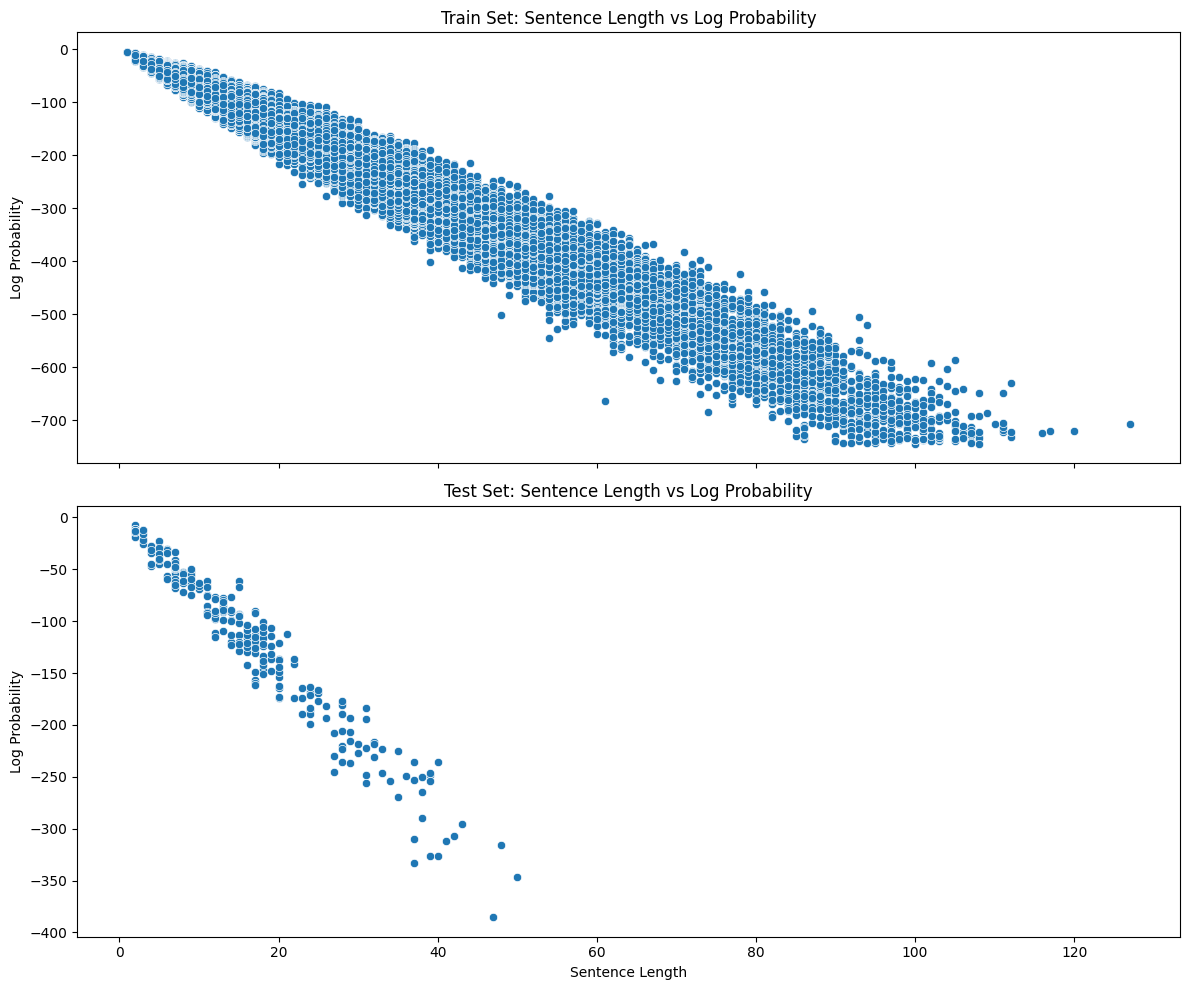

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Compute lengths and log-probabilities
train_lengths = [len(sent.split()) for sent in train_sentences]
train_log_probs = [np.log(sent_prob(sent, model, N)) if sent_prob(sent, model, N) > 0 else float('-inf') for sent in train_sentences]

test_lengths = [len(sent.split()) for sent in test_sentences]
test_log_probs = [np.log(sent_prob(sent, model, N)) if sent_prob(sent, model, N) > 0 else float('-inf') for sent in test_sentences]

# Set up subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Train plot
sns.scatterplot(x=train_lengths, y=train_log_probs, ax=axes[0])
axes[0].set_title('Train Set: Sentence Length vs Log Probability')
axes[0].set_ylabel('Log Probability')

# Test plot
sns.scatterplot(x=test_lengths, y=test_log_probs, ax=axes[1])
axes[1].set_title('Test Set: Sentence Length vs Log Probability')
axes[1].set_xlabel('Sentence Length')
axes[1].set_ylabel('Log Probability')

plt.tight_layout()
plt.show()

**Negative correlation:** There's a strong negative correlation between sentence length and log probability in both train and test sets. This is expected — longer sentences accumulate more probabilities (multiplied together), resulting in lower total probabilities (more negative log values).

**Different Sentence Length Distributions:** There is a difference in the distribution of sentence lengths. The test set seems to have significantly shorter sentences than the training set. This difference in the data characteristics could influence the perplexity results. If the test set contains simpler, shorter sentences on average, the model could assign them relatively higher probabilities compared to the more complex and longer sentences in the training set.

## Work description for Ex 2

YOUR ANSWER HERE [100-200 words]

**Ex 2.1: N-gram Model Training**

The most challenging part was implementing efficient add-k smoothing to handle unknown words/histories. We resolved this by using a `defaultdict` with a custom default probability function.

**Ex 2.2: Sentence Generation**

The main difficulty was handling the unigram case (N=1) separately, as it doesn't involve any history. We had to ensure the code correctly predicted the next word based on the appropriate context (or lack thereof, in the unigram case).

**Ex 2.3/2.4: Sentence Probability**
We implemented a function to compute the probability of a sentence using the trained N-gram model.The challenge here was to correctly multiply the probabilities of each N-gram, while again handling the unigram case separately due to the absence of history.

**Ex 2.5: Perplexity**
We created a function to calculate the perplexity of sequences using the probabilities obtained from the N-gram model. A crucial aspect was to implement proper handling of zero probabilities to prevent errors and ensure a correct perplexity calculation.

**Assistance and Tools:**
- Throughout the exercise, we used GenAI as a supportive tool. For example, we used GenAI during Ex 2.1 to better understand how to structure `defaultdict` logic.

- The TA provided guidance in Ex 2.5 about the results and the plots.

# That's it!

Congratulations, you have made it to the end of the tutorial. Here we will recap the gist of this notebook.

**Make sure all your cells can be executed and all your answers are there. Then, read on if you're interested!**

-----

By now you should have a solid feeling for the problem of **sparsity in language data**; there's just never enough data. For the task of language modelling, we saw that sparsity is a serious challenge.

It would be great to be able to model $p(w_n|w_1 \dots w_{n-1})$ for unlimited $n$: the larger $n$ the better our language model should become at capturing the long-range dependencies between words that characterize actual human sentences, and the more probability our model will assign to such sentences as opposed to sentences that are word-soup. But in the N-gram approach, increasing $n$ will quickly kill all generalizing abilities of the model: the model will start to assign probabilities only to sentences it has seen in the training data.

So, where to go from here? Here are three directions that we could head in.

### Smoothing

We have seen one example of smoothing in this lab: add-k smoothing. This is an easy method, both conceptually and implementation-wise. But the results are not great, and the effects it has on the distributions can be extreme.

A much more sophisticated method of smoothing is **Kneser-Ney smoothing**. The method is described in detail in section 4.5 of J&M (3rd edition). This is one of the best-performing N-gram smoothing methods, and up to a few years ago, a popular implementation of it called [KenLM](https://kheafield.com/code/kenlm/) gave state-of-the-art results.

### From words to characters

In this lab we have considered language modeling as the task of predicting a **word** $w_n$ based on a history of **words** $w_1\cdots w_n$. What if instead we let our basic units of modelling be **characters**? The task then becomes to model $p(c_k\mid c_{k-N-1}\dots c_{k-1})$ where each $c_i$ is now an ASCII character instead of an entire word.

Suddenly sparsity of data is no longer a problem! The set of characters to use is tiny (< 100) compared to even a small-sized vocabulary as today. Have a look at this very illustrative notebook written by Yoav Golberg to see such a method in action: [The unreasonable effectiveness of Character-level Language Models](http://nbviewer.jupyter.org/gist/yoavg/d76121dfde2618422139).

(So what is the downside?)


### Neural language models

The above notebook was actually written as a response to this blog post by Andrej Karpathy: [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/). Go ahead and read it if you haven't already: it is a superb introduction to the topic of Recurrent Neural Networks.

Neural language models solve the problem of data sparsity in a different manner. Instead of estimating the probabilities $p(w_k\mid w_{k-N-1}\dots w_{k-1})$ by counting occurrences in the data, they use a neural network $f_{\theta}$ parametrized by parameters $\theta$ to predict this probability. The parameters $\theta$ are learned through optimization.

The simplest approach goes like this: each word in the history $w_{k-N-1}\dots w_{k-1}$ is embedded separately giving vectors $e_{k-N-1}\dots e_{k-1}$ and then concatenated into one long vector $[e_{k-N-1};\dots ;e_{k-1}]$. The network then uses this history vector to predict a probability distribution over words $w$ in the vocabulary $V$:

$$p(w \mid w_{k-N-1}\dots w_{k-1}) = f_{\theta}([e_{k-N-1};\dots;e_{k-1}]).$$

(In order to produce legitimate probabilities the final layer of such a network will be for example a $softmax$.)

This provides a solution to the sparsity problem by having the network let the individual embeddings of the words in the history interact through its non-linear transformation. We are letting the network figure out the smoothing itself!

RNNs are a clever extension of this idea, where a hidden state vector $h$ is re-used and updated at each step $k$ in order to store the information of the entire history up to step $k-1$. That is, an RNN actually does away with the N-order approximation; it tries to model the full conditional directly! That means that

$$p(w \mid w_1\dots w_{k-1}) \approx RNN_{\theta}([e_{k-1};h_{k-1}])$$

where the hidden state $h_{k-1}$ is a compression of the *entire history* $w_1\dots w_{k-1}$.

Another great place to learn about RNNs, their problems, and solutions to those, is on the blog of [Christopher Olah](http://colah.github.io/posts/2015-08-Understanding-LSTMs/).

-----------
(And now, it's time to read the classic essay by Eugene Wigner that gave both of the posts their title: [The Unreasonable Effectiveness of Mathematics in the Natural Sciences](http://www.dartmouth.edu/~matc/MathDrama/reading/Wigner.html))

# Acknowledgments

Most of this lab was developed in collaboration with Joost Bastings and Dan Douwe.  
Later it was revised by a couple of people.  
The recent updates by Lasha Abzianidze make the notebook more streamlined and foolproof from the grading and the large course perspectives.